# 集成学习

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 边界绘制函数
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict =model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, cmap = custom_cmap, linewidth = 5)

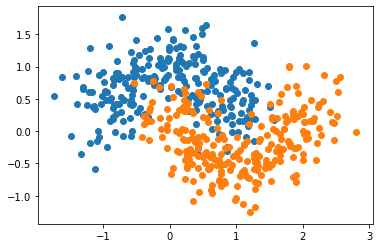

In [2]:
# 数据加载
x, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

In [3]:
# 数据split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

## 使用logistics regression

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


train score :  0.928
test score :  0.92


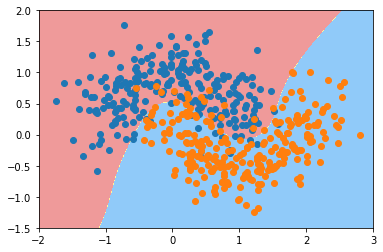

In [4]:
from sklearn.linear_model import LogisticRegression


log_reg = Pipeline([
    ("ploy", PolynomialFeatures(degree=5)),
    ("std", StandardScaler()),
    ("log", LogisticRegression(n_jobs=-1, C=10))
])
log_reg.fit(x_train, y_train)

print("train score : ", log_reg.score(x_train, y_train))
print("test score : ", log_reg.score(x_test, y_test))

plot_decision_boundary(log_reg, axis=[-2, 3, -1.5, 2])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

## 使用SVM

train score :  0.9413333333333334
test score :  0.912


D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


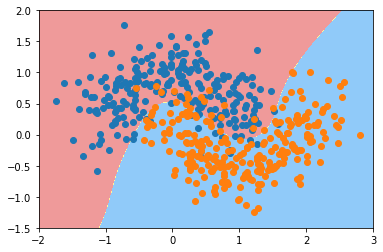

In [5]:
from sklearn.svm import SVC

svc_clf = Pipeline([
    ("std", StandardScaler()),
    ("svc", SVC(kernel="rbf",gamma=12))
])

svc_clf.fit(x_train, y_train)
svc_clf.score(x_test, y_test)

print("train score : ", svc_clf.score(x_train, y_train))
print("test score : ", svc_clf.score(x_test, y_test))

plot_decision_boundary(log_reg, axis=[-2, 3, -1.5, 2])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

## 使用decision tree

train score :  0.928
test score :  0.904


D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


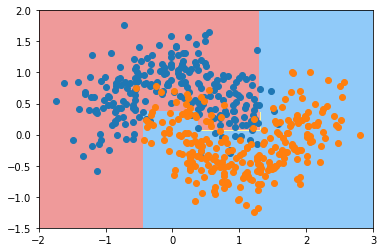

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(min_samples_leaf=12)
dt_clf.fit(x_train, y_train)

print("train score : ", dt_clf.score(x_train, y_train))
print("test score : ", dt_clf.score(x_test, y_test))

plot_decision_boundary(dt_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

## voting classifier

In [7]:
y_predict_log = log_reg.predict(x_test)
y_predict_svc = svc_clf.predict(x_test)
y_predict_dt = dt_clf.predict(x_test)

In [8]:
y_predict = np.array((y_predict_log + y_predict_svc + y_predict_dt) >= 2, dtype=int)

In [9]:
y_predict

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [10]:
score_final = np.sum(y_predict==y_test) / len(y_test)

In [11]:
score_final

0.912

## 使用sklearn中的集成学习

In [12]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ("log_clf", log_reg),
    ("svc_clf", svc_clf),
    ("dt_vlf", dt_clf)
], voting = "hard")

voting_clf.fit(x_train, y_train)

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


VotingClassifier(estimators=[('log_clf',
                              Pipeline(memory=None,
                                       steps=[('ploy',
                                               PolynomialFeatures(degree=5,
                                                                  include_bias=True,
                                                                  interaction_only=False,
                                                                  order='C')),
                                              ('std',
                                               StandardScaler(copy=True,
                                                              with_mean=True,
                                                              with_std=True)),
                                              ('log',
                                               LogisticRegression(C=10,
                                                                  class_weight=None,
                           

In [13]:
voting_clf.score(x_test, y_test)

0.912